# Ensemble method for the bore propagation


The weir of channel of water depth $h_L$ (cm) and lineic flux discharge $q$ (cm$^2$.s$^{-1})$ is abruptly and completly closed, leading to a bore of velocity $W$ (cm.s$^{-1}$ extensing a steady water of depth $h_R$ (cm). 

We choose $x=h_R$ as the control space and $y=W$ as the observation space for a data assimilation experiment where $\sigma_b$ and $\sigma_r$ are the respective standard deviation of a background $x^b$ and an measuremet $y^o$. The observation operator is 
$$ {\cal G}(x) = {-q \over h_L - x} \quad \hbox{with} \quad G= {\cal G}'(x) = {q \over (h_L-x)^2}\;.$$ 




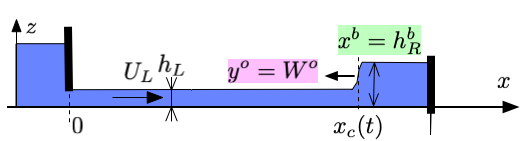







The analysis $x^a$ is the state that minimizes the cost function $J(x) = J_b(x) + J_r(x)$. We define a true state $x^t$ with a true observation $y^t={\cal G}(x^t)$ and perform twin experiments.

At first, we approximate the cost function by the incremental cost function $J_{inc}(x)$ and define the incremental analysis by
$$ \widetilde x^a = x^b + K \, [y^o- {\cal G}(x^b)]\;,$$
where $K = \sigma_b^2 \, G \, (\sigma_b^2 G^2 + \sigma_r^2)^{-1}$ is the gain.

Then, we approximation $\sigma_b^2 \, G$ and $\sigma_b^2 \, G^2$ by an ensemble method
\begin{eqnarray}
\sigma_b^2\, G \sim  {\cal A}^{\sigma_b^2\,G} & =& 
{1\over R}\sum_{r=1}^R 
\left(x^{(r)} -x^b\right) \left(y^{(r)} -y^b\right) 
\cr
\sigma_b^2\, G^2 \sim  {\cal A}^{\sigma_b^2\,{G^2}}& =&
  {1\over R}\sum_{r=1}^R \left(y^{(r)} -y^b\right) \left(y^{(r)}
  -y^b\right) \;,
  \end{eqnarray}
where $x^{(r)}$ for $r=1,...R$ is coming out a gaussian random variable of  mean $x^b$ and variance $\sigma_b^2$, $y{(r)} ={\cal G}\left(x^{(r)}\right)$  and
$y^b= {\cal G}\left(x^b\right)$. We then compute an approximation of the gain with these approximations. 


This programs shows:
*   The dispersion of ${\cal G}(x^{(r)})$ around $y_b={\cal G}(x_b)$
*   Comparisons of ${\cal A}^{\sigma_b^2\,G}$ with $\sigma_b^2\, G$ and ${\cal A}^{\sigma_b^2\,{G^2}}$ with $\sigma_b^2\, G^2$ for increasing $R$ values
*   Comparisons of the scores $|x^a-x^t|$ for both the incremental and ensemble methods. 


**References:**

*   O. Thual, "[Introduction to Data Assimilation for Scientists and Engineers](http://pedagotech.inp-toulouse.fr/130202/co/module_idase.html)", Open Learn. Res. Ed. INP 0202 (2013) 6h


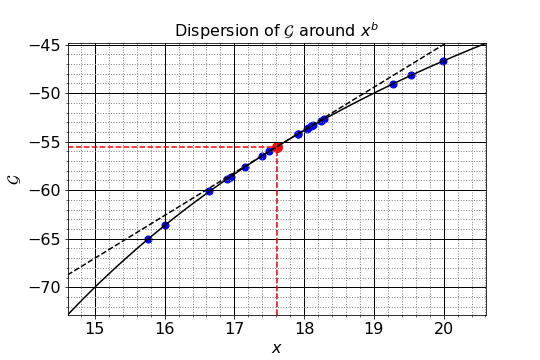

# Compilation of the subroutines

Execute first the code below to define the functions!

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
  
def inifig(xdim=7.5,ydim=5):
    # Standard figure initialization with grids
    plt.figure(figsize=(xdim,ydim))
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.minorticks_on()
    plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
    plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
    #plt.axhline(0); plt.axvline(0)
    plt.xticks(fontsize=16); plt.yticks(fontsize=16)            

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Linearized observation operator
    cGprime=q/(x-hL)**2
    return cGprime
    
def Jb_cost(x):
    # Background part of the cost function 
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    # Observation part of the cost function 
    return (yo-cG_nol(x))**2/(2*sigr**2)

def J_cost(x):
    # Cost function
    return Jb_cost(x)+Jr_cost(x)

def Jrinc_cost(x):
    # Observation part of the incremental cost function 
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    # Incremental cost function
    return Jb_cost(x)+Jrinc_cost(x)

# Sample experiments

The following parameters can be modified:  

*   `sigb`: The standard deviation of $x^b$
*   `sigr`: The standard deviation $y^o$
*   `show_opera`: =True to visualize dispersion of $\cal G$
*   `show_gain`: =True to visualize to approximation of the gain
*   `show_score`: =True to visualize the analysis scores
*   `Remin`, `Remax`: Ensemble size $R\in [10^{Re_{min}}, 10^{Re_{max}}]$

In [ ]:
# Parameters to change
sigb=1; # Standard deviation of the background hR (cm)
sigr=10; # Standard deviation of the obseveration W (cm/s) 
ext=".png" # Figure format ".png" or ".pdf"
print('====== Ensemble bore =========')

# Parameters for the plot of the cost functions
Remin=1; Remax=3; Rexp=100; # Number of experiments every 10^Re

# Parameters for the plots
show_opera=True # Dispersion of the observation operator
show_gain=True # Show the approximation for the gain
show_score=True # Show the score for both methods

# Other parameters with no interest in changing
q=700 ; # Lineic discharge flux before experiment (cm^2/s))
hL= 5 # Water depth before experiment (cm)
xt=17;  # True state (cm)

# Derived parameters
sigb2=sigb**2; sigr2=sigr**2;
yt=cG_nol(xt) # True observations

# Show dispersion around xb
if show_opera:
    # Choose a xb
    xb=xt+np.random.normal(0,sigb)
    yb=cG_nol(xb);
    # Plot cG_nol around xb
    dxb=3*sigb; xbmin=xb-dxb; xbmax=xb+dxb;
    xblin=np.linspace(xbmin,xbmax,100)
    yblin=cG_nol(xblin)
    # dispersion
    xr=np.random.normal(xb,sigb,20)
    yr=cG_nol(xr)
    # Tangent line
    G=G_lin(xb)
    ybmin=yb-G*dxb; ybmax=yb+G*dxb
    # Figure    
    inifig()
    plt.title('Dispersion of $\cal G$ around $x^b$',fontsize=16)
    plt.xlabel("$x$",fontsize=16); 
    plt.ylabel('$\cal G$',fontsize=16)
    plt.plot(xblin,yblin,color='black')
    plt.plot([xbmin,xbmax],[ybmin,ybmax],linestyle="--",color='black')
    plt.plot([xb,xb],[cG_nol(xbmin),yb],linestyle="--",color='red')
    plt.plot([xbmin,xb],[yb,yb],linestyle="--",color='red')
    plt.scatter(xr,yr,marker='o',color='blue',s=50)
    plt.scatter(xb,yb,marker='o',color='red',s=100)
    plt.xlim(xbmin,xbmax)
    plt.ylim(cG_nol(xbmin),cG_nol(xbmax))
    plt.savefig('opera'+ext)
    plt.show()

# Increasing the size of the ensemble
Rtab=np.array([]); 
sinc=np.array([]); sens=np.array([]); 
esigb2G=np.array([]); esigb2G2=np.array([]);
bis=np.array([])

#for R in range(Rmin,Rmax):
for Re in np.linspace(Remin,Remax,Rexp):
    R=int(10**Re)
    Rtab=np.append(Rtab,R)
    # Experiment 
    xb=xt+np.random.normal(0,sigb)
    yb=cG_nol(xb);
    yo=yt+np.random.normal(0,sigr)
    G=G_lin(xb)
    sigb2G=sigb2*G
    sigb2G2=sigb2G*G
    # Incremental analysis
    Kinc=sigb2G/(sigb2G2+sigr2)
    xainc=xb+Kinc*(yo-yb)
    sinc=np.append(sinc,abs(xainc/xt-1))
    # Ensemble method
    xr=np.random.normal(xb,sigb,R)
    yr=cG_nol(xr)
    dxr=xr-xb; dyr=yr-yb;
    ## Approximation of sigb^2 G
    sigb2GR=np.sum(dxr*dyr)/R
    esigb2GR=abs(sigb2GR/sigb2G-1)
    esigb2G=np.append(esigb2G,esigb2GR)
    ## Approximation of sigb^2 G^@
    sigb2G2R=np.sum(dyr*dyr)/R
    esigb2G2R=abs(sigb2G2R/sigb2G2-1)
    esigb2G2=np.append(esigb2G2,esigb2G2R)
    ## Ensemble analysis
    Kens=sigb2GR/(sigb2G2R+sigr2)
    xaens=xb+Kens*(yo-yb)
    sens=np.append(sens,abs(xaens/xt-1))
    
# Scores for the estimation of sigb2G and sigb2GG
if show_gain:
    inifig()
    plt.title('Estimation of $\sigma_b^2G$ (black) and $\sigma_b^2G^2$ (red)'\
              ,fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("$R$",fontsize=16); 
    plt.ylabel('$|\sigma_b^nG(R)/\sigma_b^nG-1|$',fontsize=16)
    plt.plot(Rtab,esigb2G,color='black')
    plt.plot(Rtab,esigb2G2,color='red')
    # Fit with -1/2 lines
    xfit=np.array([Rtab[0],Rtab[-1]])
    for k in np.linspace(1,-1,5):
        print("Dashed blue curve : S= 10^k R^{-1/2} with k=",k)
        plt.plot(xfit,10**k*xfit**(-.5),color='blue',\
                 linestyle="--",linewidth=2)
    plt.xscale("log"); plt.yscale("log")
    plt.savefig('gain'+ext)
    plt.show()

# Scores for the estimation of the analysis
if show_score:
    inifig()
    plt.title('Analyses : incremental (blue), ensemble (green)',fontsize=16)
    plt.axvline(0); plt.axhline(0)  
    plt.xlabel("$R$",fontsize=16); 
    plt.ylabel('$|x^a/x^t-1|$',fontsize=16)
    plt.plot(Rtab,sinc,color='blue')
    plt.plot(Rtab,sens,color='green')
    plt.xscale("log"); 
    plt.yscale("log")
    plt.savefig('score'+ext)
    plt.show()
        
   
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()


# Comment on the errors

We see that ensemble method provides a good approximation of the gain method.

# Estimation of the analysis standard deviation

The standard deviation $\sigma_a$ of the analysis is smaller that the standard deviation $\sigma_b$ of the background. 



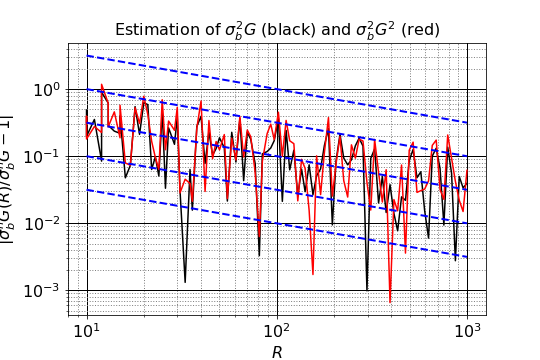

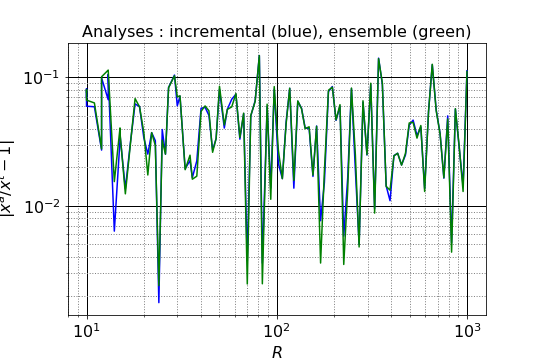